# R Analysis

In [175]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import polyfit, polyval

%matplotlib inline

## objectives
1. year vice graph NDVI values
2. yala, maha season vice graph in one yr
3. remove the cloud affect & regraph

In [2]:
ndvi_df = pd.read_csv('./csv/ndvi.csv')
ndvi_df.head(5)

,Unnamed: 0,channel,date,min,max,mean,stDev
0,177,0,2015-11-28,0.024384,0.242231,0.088855,0.051101
1,176,0,2015-12-28,-0.012204,0.110473,0.036047,0.022595
2,175,0,2016-03-27,0.065089,0.313997,0.182319,0.043077
3,174,0,2016-04-26,0.072630,0.266636,0.181640,0.039938
4,173,0,2016-06-05,0.025319,0.680269,0.191573,0.141791


In [3]:
type(ndvi_df['mean'])

pandas.core.series.Series

### yr vice mean NDVI value graph with cloud

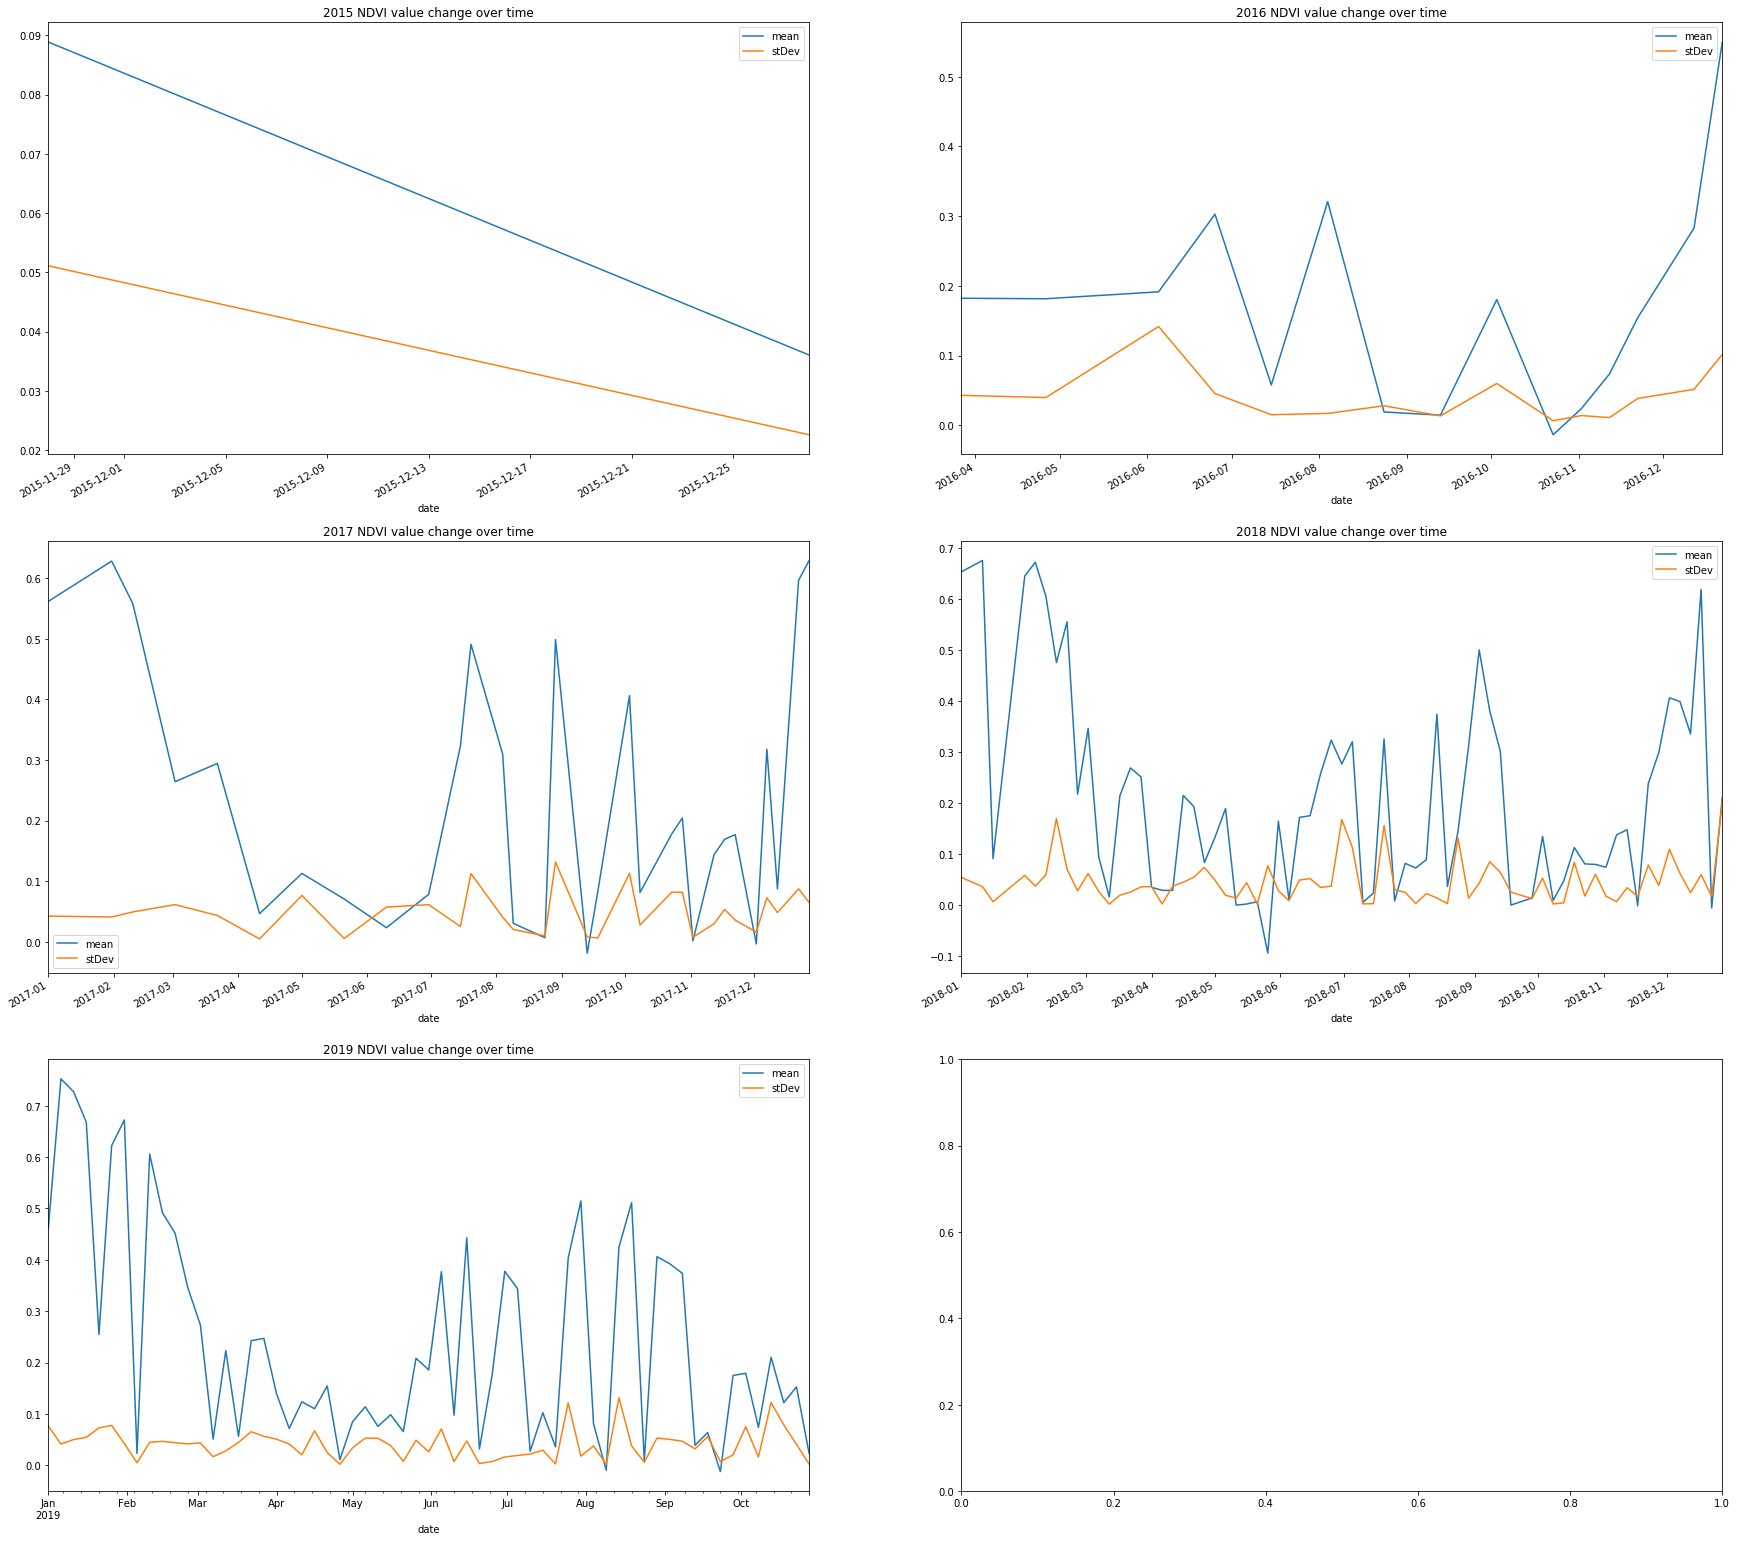

In [4]:
years = [2015, 2016, 2017, 2018,2019]
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(30,30))
row = col =0
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])

for i, year in enumerate(years):
    new_df = ndvi_df[ndvi_df['date'].dt.year == year]
   
    if i % 2==0:
        col = 0
        row = row +1
    else:
        col = 1
    
    #save data & and plot
    new_df.to_csv('./csv/'+str(year)+'ndvi.csv', sep=',')
#     axes[row-1,col].plot(new_df['date'],new_df['mean'])
    new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[row-1,col])
    axes[row-1,col].set_title(str(year) + ' NDVI value change over time')
    

    

### yr vice with yala maha season NDVI values change over the time with cloud

In [5]:
def ndvi_yala_maha(yala_Maha_dates, yala_maha_tag):
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    for i in range(0,2):

        # check the date between start_date and end_date and plot them
        new_df = df[(df['date'] >= yala_Maha_dates[i][0]) &  (df['date'] <= yala_Maha_dates[i][1])]

    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
        ax = new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[i])
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20) 

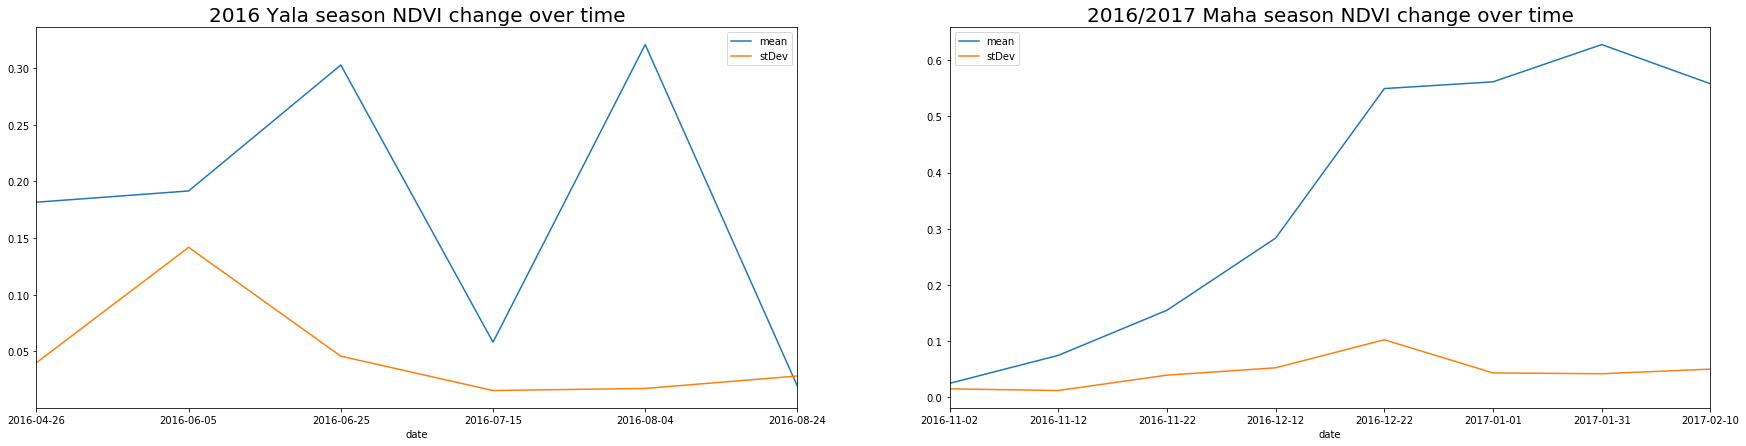

In [6]:
# ndvi_yala_maha(csv_file, start_date, end_date,tag=('yala/maha'))
ndvi_yala_maha([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016/2017', 'Maha']])


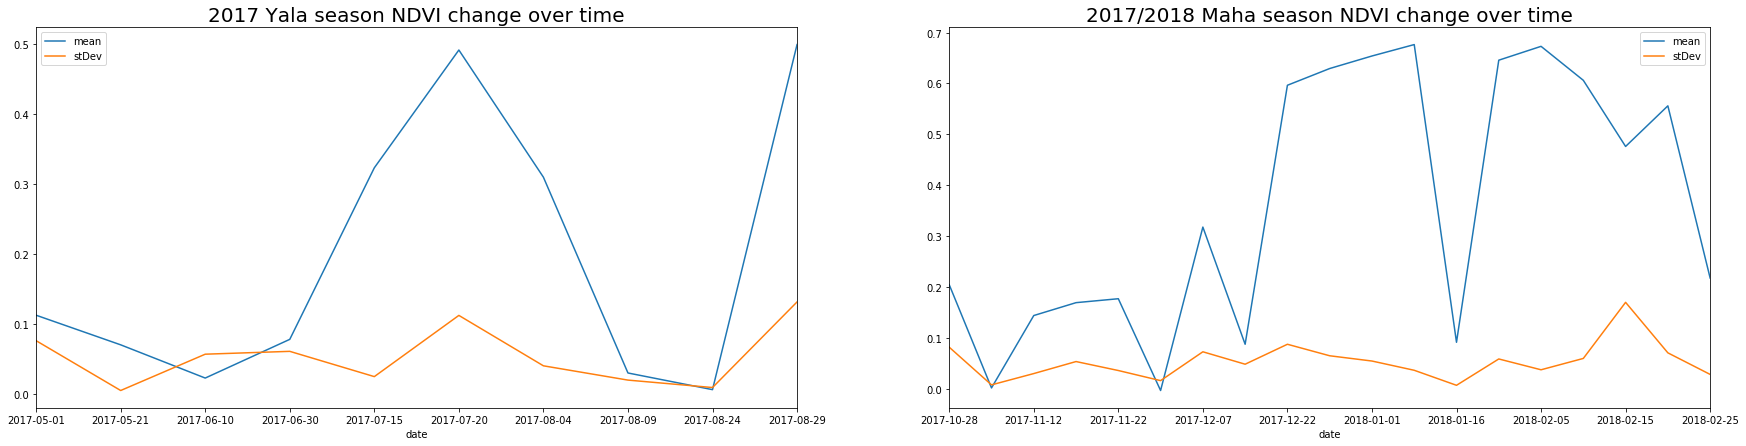

In [7]:
ndvi_yala_maha([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017/2018', 'Maha']])

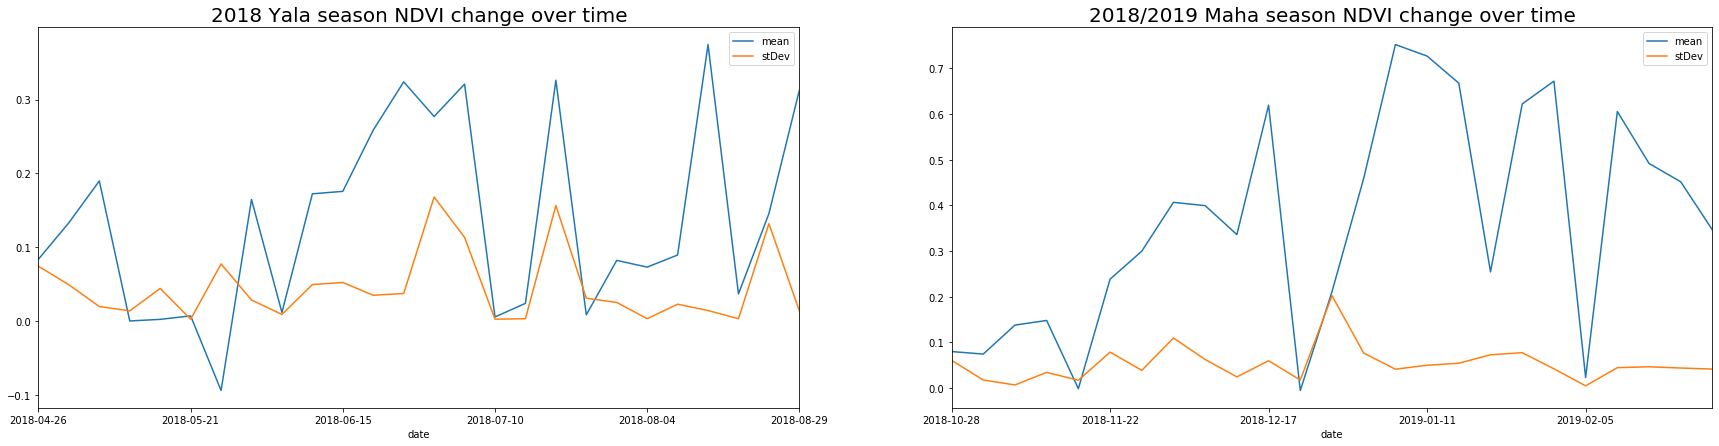

In [8]:
ndvi_yala_maha([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-25']],[['2018', 'Yala'],['2018/2019', 'Maha']])

d:\campuz\4 yr\research-final\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


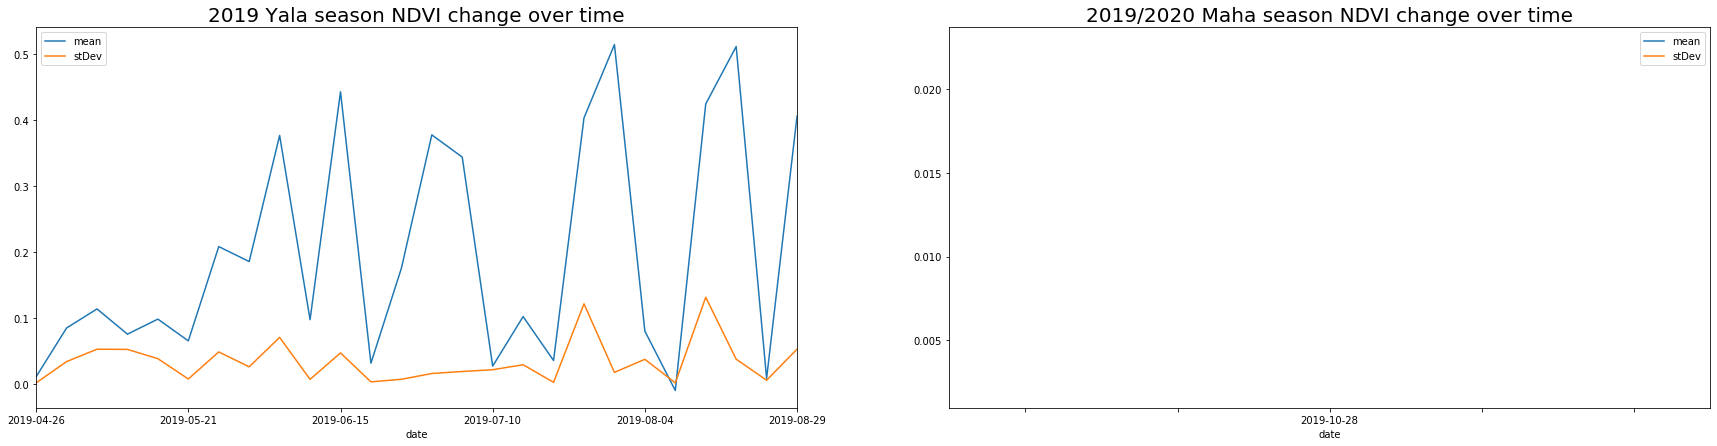

In [9]:
ndvi_yala_maha([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019/2020', 'Maha']])

### yr vice with yala maha season NDVI values change over the time without cloud and best fit line

In [26]:
def get_cloud_free_dates(root = './b11b8b2-dataset'):
    
    could_free_arr=[]
    
    for _root, _dirs, _files in os.walk(root):
        if _files:
            could_free_arr += _files
            
    # get only date array
    
    for i, elem in enumerate(could_free_arr):
        could_free_arr[i] = elem.split('_')[-2].split('T')[0]
    
    return (could_free_arr)

In [229]:
def ndvi_yala_maha_with_out_cloud(yala_Maha_dates, yala_maha_tag):
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    cloud_free_dates = get_cloud_free_dates()
    rows = []
    col = ['date', 'mean', 'stDev']
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    # create a df  cloud
    for date in cloud_free_dates:
#         print(date) sub_df.iloc[0]['A']
        cloud_free_df = df[(df.date == date)]
        row = [cloud_free_df.iloc[0]['date'], cloud_free_df.iloc[0]['mean'], cloud_free_df.iloc[0]['stDev']]
        rows.append(row)
        
    cloud_free_df = pd.DataFrame(rows, columns=col) # this is a cloud free dataset
    
    
    for i in range(0,2):

        # check the date between start_date and end_date and plot them
        new_df = cloud_free_df[(cloud_free_df['date'] >= yala_Maha_dates[i][0]) &  (cloud_free_df['date'] <= yala_Maha_dates[i][1])]
        
        if len(new_df.index) <= 1:
            continue # to remove the error of 0 data points
            
    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
    
        ax = new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[i])
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20) 
        
        numaric_dates = [date for date in pd.to_datetime(new_df['date']).map(dt.datetime.toordinal)]
        mean_val = [mean for mean in new_df['mean']]
        p1 = polyfit(numaric_dates, mean_val, 1)
        print('gradient is: ' + str(p1[0]))
        ax.plot([date for date in new_df['date']], polyval(p1,numaric_dates),'g--')
    
        

gradient is: 0.0020197529184050214
gradient is: 0.005184180987248778


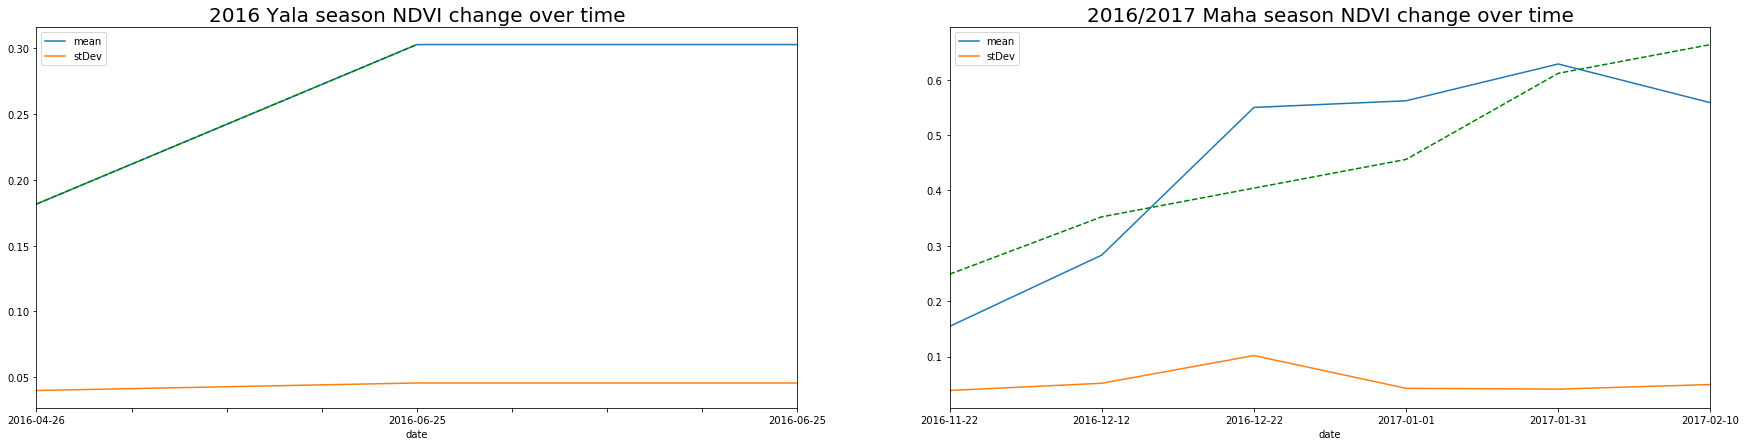

In [230]:
ndvi_yala_maha_with_out_cloud([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016/2017', 'Maha']])

gradient is: 0.004380542938768891


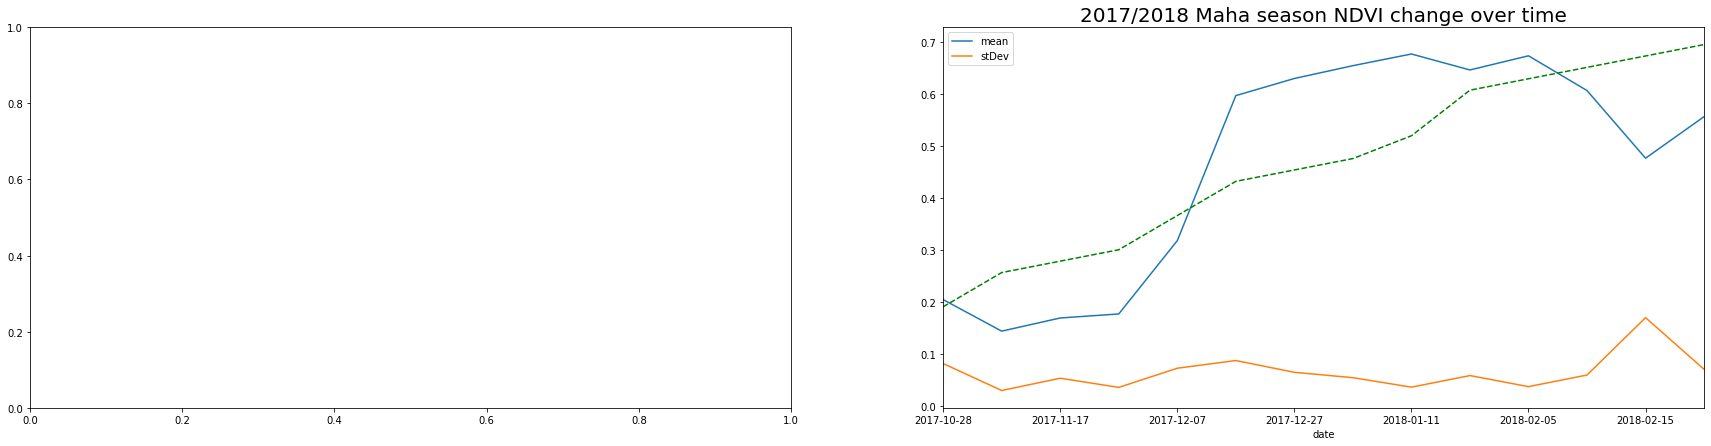

In [231]:
ndvi_yala_maha_with_out_cloud([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017/2018', 'Maha']])

gradient is: 0.0016317190805207394
gradient is: 0.002945827159734775


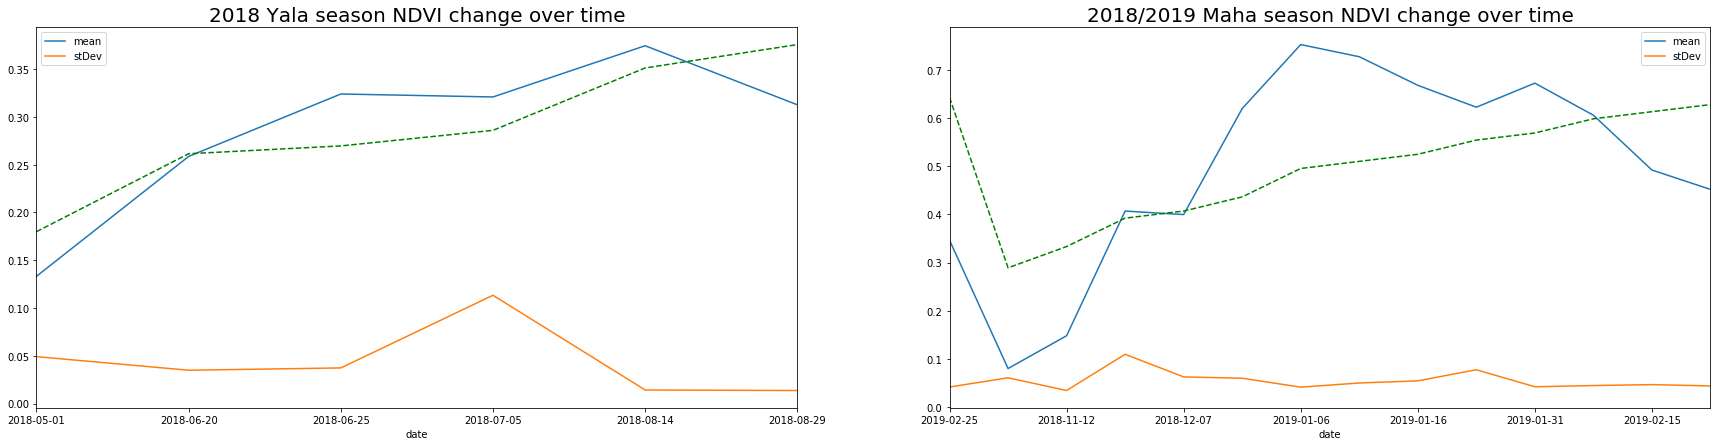

In [232]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-25']],[['2018', 'Yala'],['2018/2019', 'Maha']])

gradient is: 0.004290885661482019


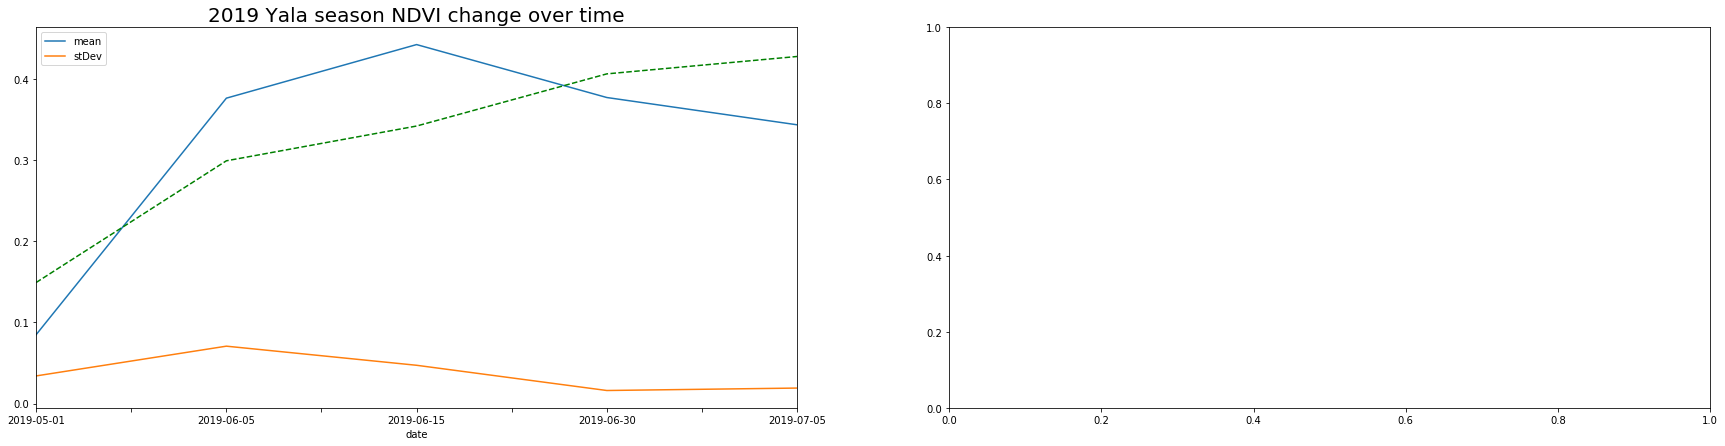

In [233]:
ndvi_yala_maha_with_out_cloud([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019/2020', 'Maha']])

### corelation analysis with gradient of the NDVI over time vs past yield data of paddy